In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

In [22]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [4]:
file = 'tess2019306063752-s0018-0000000326815804-0162-s_lc.fits'
tbl = Table.read(file, format='fits')

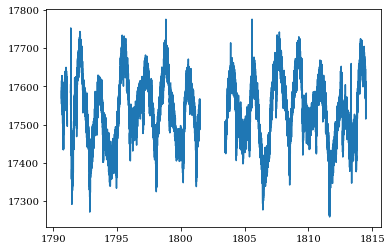

In [6]:
plt.plot(tbl['TIME'], tbl['PDCSAP_FLUX'])

In [114]:
df = tbl.to_pandas()
ok = np.where(np.isfinite(df['PDCSAP_FLUX']) & (df['QUALITY']==0))[0]

In [30]:
period_orig = 6.005 # previously published

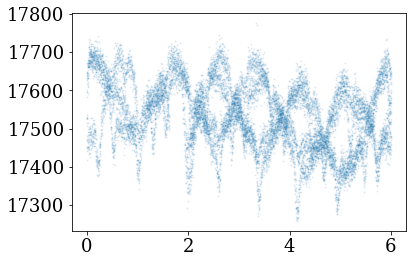

In [115]:
plt.scatter(df['TIME'].values[ok] % period_orig, df['PDCSAP_FLUX'].values[ok], alpha=0.1, s=1)

In [9]:
import exoplanet as xo

In [116]:
frequency, power = xo.estimators.LombScargle(df['TIME'].values[ok], df['PDCSAP_FLUX'].values[ok]).autopower()

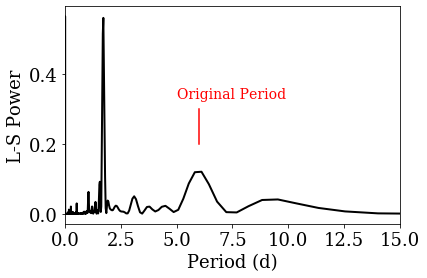

In [117]:
plt.plot(1./frequency, power, lw=2, c='k')

plt.xlim(0, 15)
plt.xlabel('Period (d)')
plt.ylabel('L-S Power')

plt.plot([period_orig, period_orig], [0.2,0.3], c='r')
plt.text(5, 0.33, 'Original Period', fontsize=14, color='r')
plt.savefig('LS.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [118]:
period_p = 0.521 * 2 # the exoplanet candidate period found, x2 b/c it's a binary (even/odd test)
print(period_p)

1.042


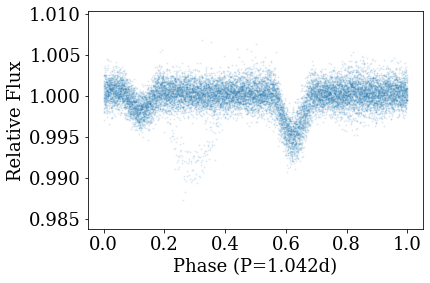

In [119]:
smo = df['PDCSAP_FLUX'][ok].rolling(350, center=True).median()

plt.scatter((df['TIME'].values[ok] % period_p) / period_p, 
            (df['PDCSAP_FLUX'].values[ok] - smo)/np.nanmedian(df['PDCSAP_FLUX'].values[ok]) + 1, alpha=0.1, s=1)
plt.ylabel('Relative Flux')
plt.xlabel('Phase (P=1.042d)')
plt.savefig('EB.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

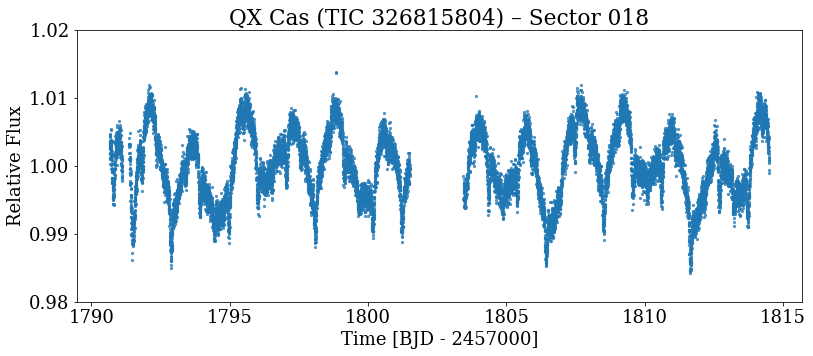

In [120]:
plt.figure(figsize=(13,5))

plt.scatter(df['TIME'].values[ok], df['PDCSAP_FLUX'].values[ok] / np.nanmedian(df['PDCSAP_FLUX'].values[ok]),
           alpha=0.7, s=5)
plt.xlabel('Time [BJD - 2457000]')
plt.ylim(0.98, 1.02)
plt.ylabel('Relative Flux')

plt.title('QX Cas (TIC 326815804) – Sector 018')
plt.savefig('LC.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [121]:
# a weird isolated transit?
wd = np.where(((df['TIME'].values[ok] % period_p) / period_p > 0.2) & 
              ((df['TIME'].values[ok] % period_p) / period_p < 0.4) & 
              ((df['PDCSAP_FLUX'].values[ok] - smo)/np.nanmedian(df['PDCSAP_FLUX'].values[ok]) + 1 < 0.997))[0]

Text(0, 0.5, 'Relative Flux')

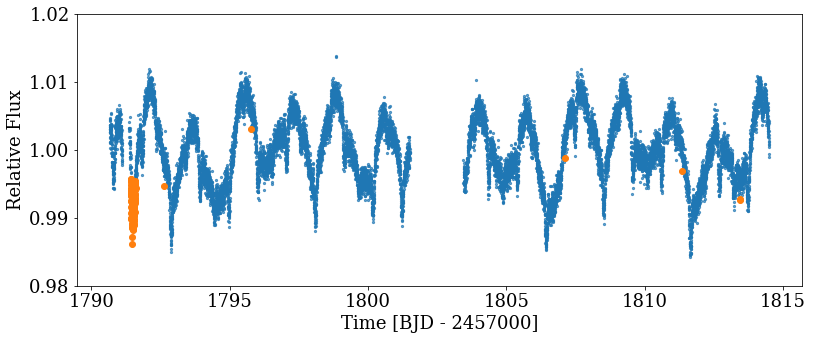

In [122]:
plt.figure(figsize=(13,5))

plt.scatter(df['TIME'].values[ok], df['PDCSAP_FLUX'].values[ok] / np.nanmedian(df['PDCSAP_FLUX'].values[ok]),
           alpha=0.7, s=5)
plt.scatter(df['TIME'].values[ok][wd], df['PDCSAP_FLUX'].values[ok][wd] / np.nanmedian(df['PDCSAP_FLUX'].values[ok]))
plt.xlabel('Time [BJD - 2457000]')
plt.ylabel('Relative Flux')
plt.ylim(0.98, 1.02)


(1791, 1793)

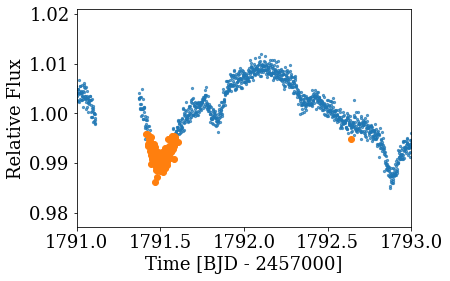

In [123]:
plt.scatter(df['TIME'].values[ok], df['PDCSAP_FLUX'].values[ok] / np.nanmedian(df['PDCSAP_FLUX'].values[ok]),
           alpha=0.7, s=5)
plt.scatter(df['TIME'].values[ok][wd], df['PDCSAP_FLUX'].values[ok][wd] / np.nanmedian(df['PDCSAP_FLUX'].values[ok]))
plt.xlabel('Time [BJD - 2457000]')
plt.ylabel('Relative Flux')
plt.xlim(1791,1793)

In [124]:
# weird, but not significant enough to chase, given the data gap right before
# it's probably just an artifact

Text(0, 0.5, 'L-S Power')

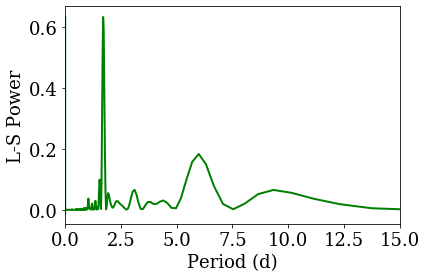

In [141]:
sok = np.isfinite(smo)
frequency1, power1 = xo.estimators.LombScargle(df['TIME'].values[ok][sok], smo[sok]).autopower()

plt.plot(1./frequency1, power1, lw=2, c='g')

plt.xlim(0, 15)
plt.xlabel('Period (d)')
plt.ylabel('L-S Power')

In [145]:
# so after removing the transit (just doing periodogram on the smoothed data)
# we still have a peak w/ the main power due to starspots at 1.7d

pk = np.where((1./frequency1 > 0.1))
print(1./frequency1[pk][np.argmax(power1[pk])])

1.704449685515061


In [130]:
# how much brighter is QX Cas than the nearby star?
10**(0.4 * (13.38 - 9.98))

# about 22x brighter

22.90867652767775

In [132]:
# put another way, the other star contributes 4.4% of the light
10**(0.4 * (9.98- 13.38 ))

0.04365158322401656

In [128]:
# so if the EB's depth is 0.993 in this LC, it could plausibly be...
(1-0.993) * 22.9086

# a 16% depth eclipse of the background star, definitely feasible

0.16036020000000015

In [137]:
# but the starspot modulations, which have about the same timescale, are 2% amplitudes
0.02 * 22.9086
# meaning they'd have to be a whopping 45% flux variation to be caused by the background star?!?!

0.458172